In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set style
sns.set(style='whitegrid')

In [3]:
# Step 1: Create synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

In [4]:
# Step 2: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 3: Train Ridge Regression model
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

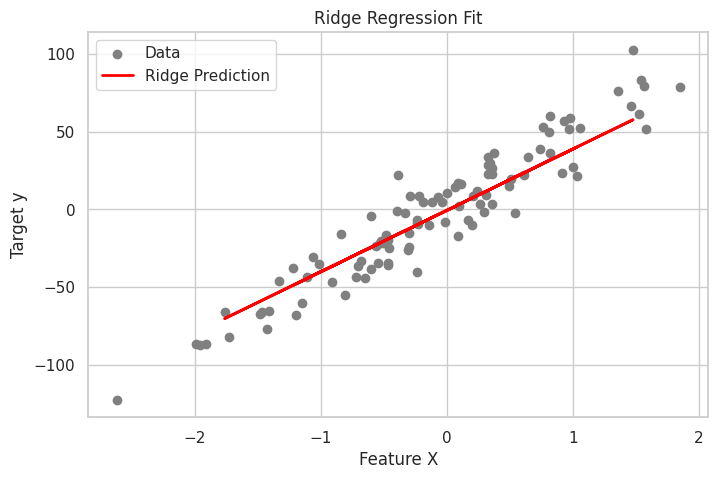

In [6]:
# Step 4: Visualize the original data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Ridge Prediction')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Ridge Regression Fit")
plt.legend()
plt.show()

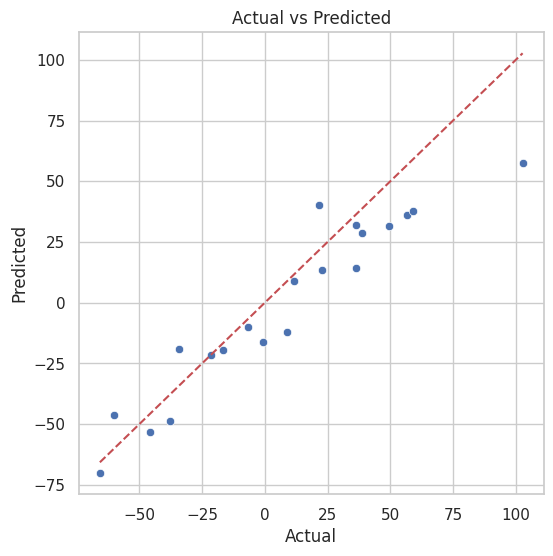

In [7]:
# Step 5: Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [8]:
# Step 6: Print metrics
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

R² Score: 0.85
MSE: 280.70


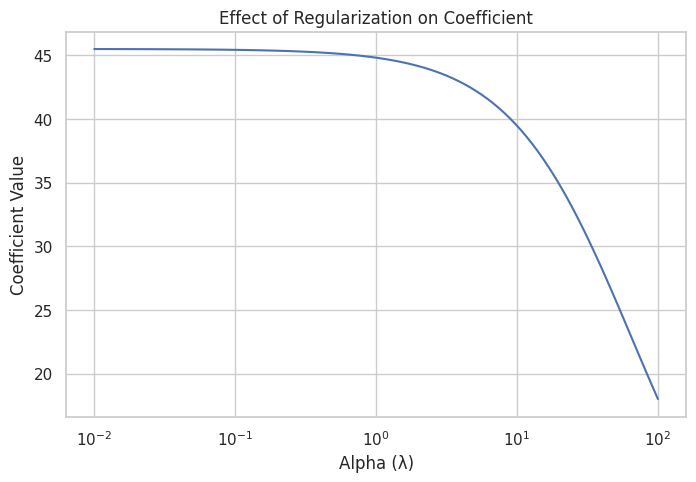

In [9]:
# Step 7: Effect of Alpha on Coefficients
alphas = np.logspace(-2, 2, 100)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])

plt.figure(figsize=(8, 5))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Coefficient Value')
plt.title('Effect of Regularization on Coefficient')
plt.grid(True)
plt.show()